<style>
@import url('https://fonts.googleapis.com/css2?family=Vazirmatn&display=swap')
</style>
<link rel="stylesheet" type="text/css" href="../../custom_jupyter_style.css">

.

In [1]:
import pymonntorch as pmt
import torch 
from matplotlib import pyplot as plt

In [2]:
import model as mdl
import current as cnt
from getDevice import get_device
from dt import TimeResolution
from plot import plot
from di import dI
from myModel import AELIF as MyAELIF

In [3]:

def simulate(title="LIF",
              model=mdl.LIF(),
              current=cnt.SteadyCurrent(value=6),
                DEVICE=get_device(force_cpu=True )[0],
                 dt=0.5 ,
                 iteration=1000,
                 ng_size=2,
                 print_plots = True):

      net = pmt.Network(device=DEVICE, dtype=torch.float32, behavior={1: TimeResolution(dt=dt)})

      ng = pmt.NeuronGroup(size= ng_size,net= net, behavior= {
                                        2: current,
                                        3: dI(),
                                        4: model,
                                        
                                        9: pmt.Recorder(variables=["u", "I","w"], tag="ng1_rec, ng1_recorder"),
                                        10: pmt.EventRecorder("spike", tag="ng1_evrec"),
                                      }
                                      )



      net.initialize()

      net.simulate_iterations(iteration)

      plot_title = f"[[{title}]]\n"
      mean_u = torch.sum(net["u", 0], axis=0) / (iteration)
      mean_I = torch.sum(net["I", 0], axis=0) / (iteration)

      plot_title += "\n".join([ f"current: {ng[2][0]}", 
                               f"model: {ng[4][0]}", 
                               f"time resolution: {dt}", 
                               f"ng size: {ng_size}", 
                               f"iteration num: {iteration}",
                               f"mean u: {mean_u}",
                               f"mean I: {mean_I}",
                                 ])


      print_plots and plot(net,plot_title)
      return net

mps is available but it is forced to use CPU


# قسمت آ)

## SteadyCurrent

### A - 1 - AELIF

#### A - 1 - AELIF

In [4]:
title = "A-1-AELIF"

Network['Network_1', 'Network'](Neurons: tensor(2)|1 groups, Synapses: tensor(0.)|0 groups){1:TimeResolution(dt=0.5,)}
NeuronGroup['NeuronGroup_1', 'NeuronGroup', 'ng'](2){2:SteadyCurrent(value=100,)3:dI()4:MyModel(threshold=30,u_reset=-73.42,u_rest=-65,R=1.7,tau_m=10,u_rh=-50,delta_t=0.1,a=0,b=1,tau_w=10,w_booster_coef=-100,w_decay_coef=0.1,di_coef=0,w_threshold=0,refractory_period=0,)9:Recorder(variables=['u', 'I', 'w'],gap_width=0,max_length=None,auto_annotate=True,tag=ng1_rec, ng1_recorder,)10:EventRecorder(variables=None,gap_width=0,max_length=None,auto_annotate=True,tag=ng1_evrec,arg_0=spike,)}
1000xBatch: 1/1 (100%) 173.339ms


/Users/amirali/Library/Mobile Documents/com~apple~CloudDocs/Me/University/Term 8/CNS/HomeWork/amini-amirali-610399102-cns-p01/Amini-AmirAli-610399102-cns-hw1/di.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ng.prev_I = torch.tensor(ng.I)
/Users/amirali/Library/Mobile Documents/com~apple~CloudDocs/Me/University/Term 8/CNS/HomeWork/amini-amirali-610399102-cns-p01/Amini-AmirAli-610399102-cns-hw1/di.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ng.prev_I = torch.tensor(ng.I)


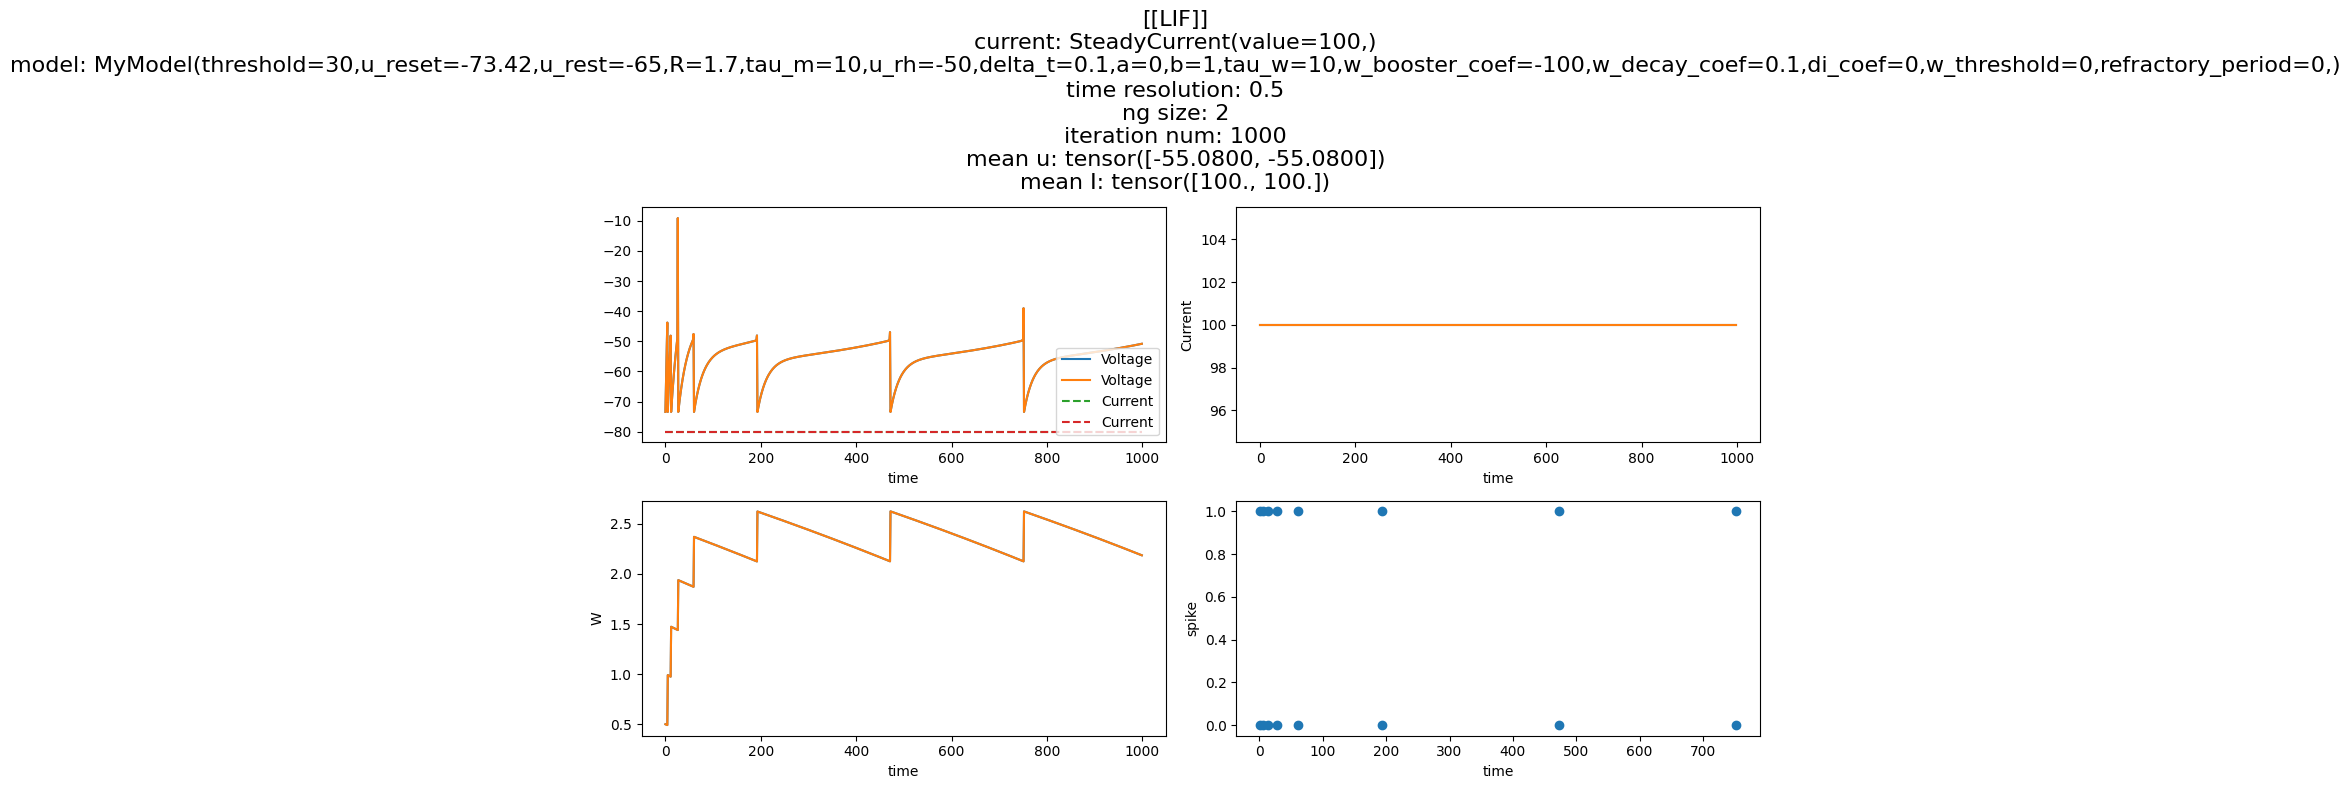

Network['Network_1', 'Network'](Neurons: tensor(2)|1 groups, Synapses: tensor(0.)|0 groups){1:TimeResolution(dt=0.5,)}
NeuronGroup['NeuronGroup_1', 'NeuronGroup', 'ng'](2){2:SteadyCurrent(value=100,)3:dI()4:MyModel(threshold=30,u_reset=-73.42,u_rest=-65,R=1.7,tau_m=10,u_rh=-50,delta_t=0.1,a=0,b=1,tau_w=10,w_booster_coef=-100,w_decay_coef=0.1,di_coef=0,w_threshold=0,refractory_period=0,)9:Recorder(variables=['u', 'I', 'w'],gap_width=0,max_length=None,auto_annotate=True,tag=ng1_rec, ng1_recorder,)10:EventRecorder(variables=None,gap_width=0,max_length=None,auto_annotate=True,tag=ng1_evrec,arg_0=spike,)}

In [5]:
simulate(model=MyAELIF(w_decay_coef=0.1, di_coef=0, b=1, tau_w=10, w_booster_coef=-100, w_threshold=0), current=cnt.SteadyCurrent(value=100),iteration=1000)


Network['Network_1', 'Network'](Neurons: tensor(2)|1 groups, Synapses: tensor(0.)|0 groups){1:TimeResolution(dt=0.5,)}
NeuronGroup['NeuronGroup_1', 'NeuronGroup', 'ng'](2){2:SteadyCurrent(value=100,)3:dI()4:MyModel(threshold=30,u_reset=-73.42,u_rest=-65,R=1.7,tau_m=10,u_rh=-50,delta_t=0.1,a=0,b=1,tau_w=10,w_booster_coef=-100,w_decay_coef=0.01,di_coef=0,w_threshold=0,refractory_period=0,)9:Recorder(variables=['u', 'I', 'w'],gap_width=0,max_length=None,auto_annotate=True,tag=ng1_rec, ng1_recorder,)10:EventRecorder(variables=None,gap_width=0,max_length=None,auto_annotate=True,tag=ng1_evrec,arg_0=spike,)}
1000xBatch: 1/1 (100%) 167.226ms


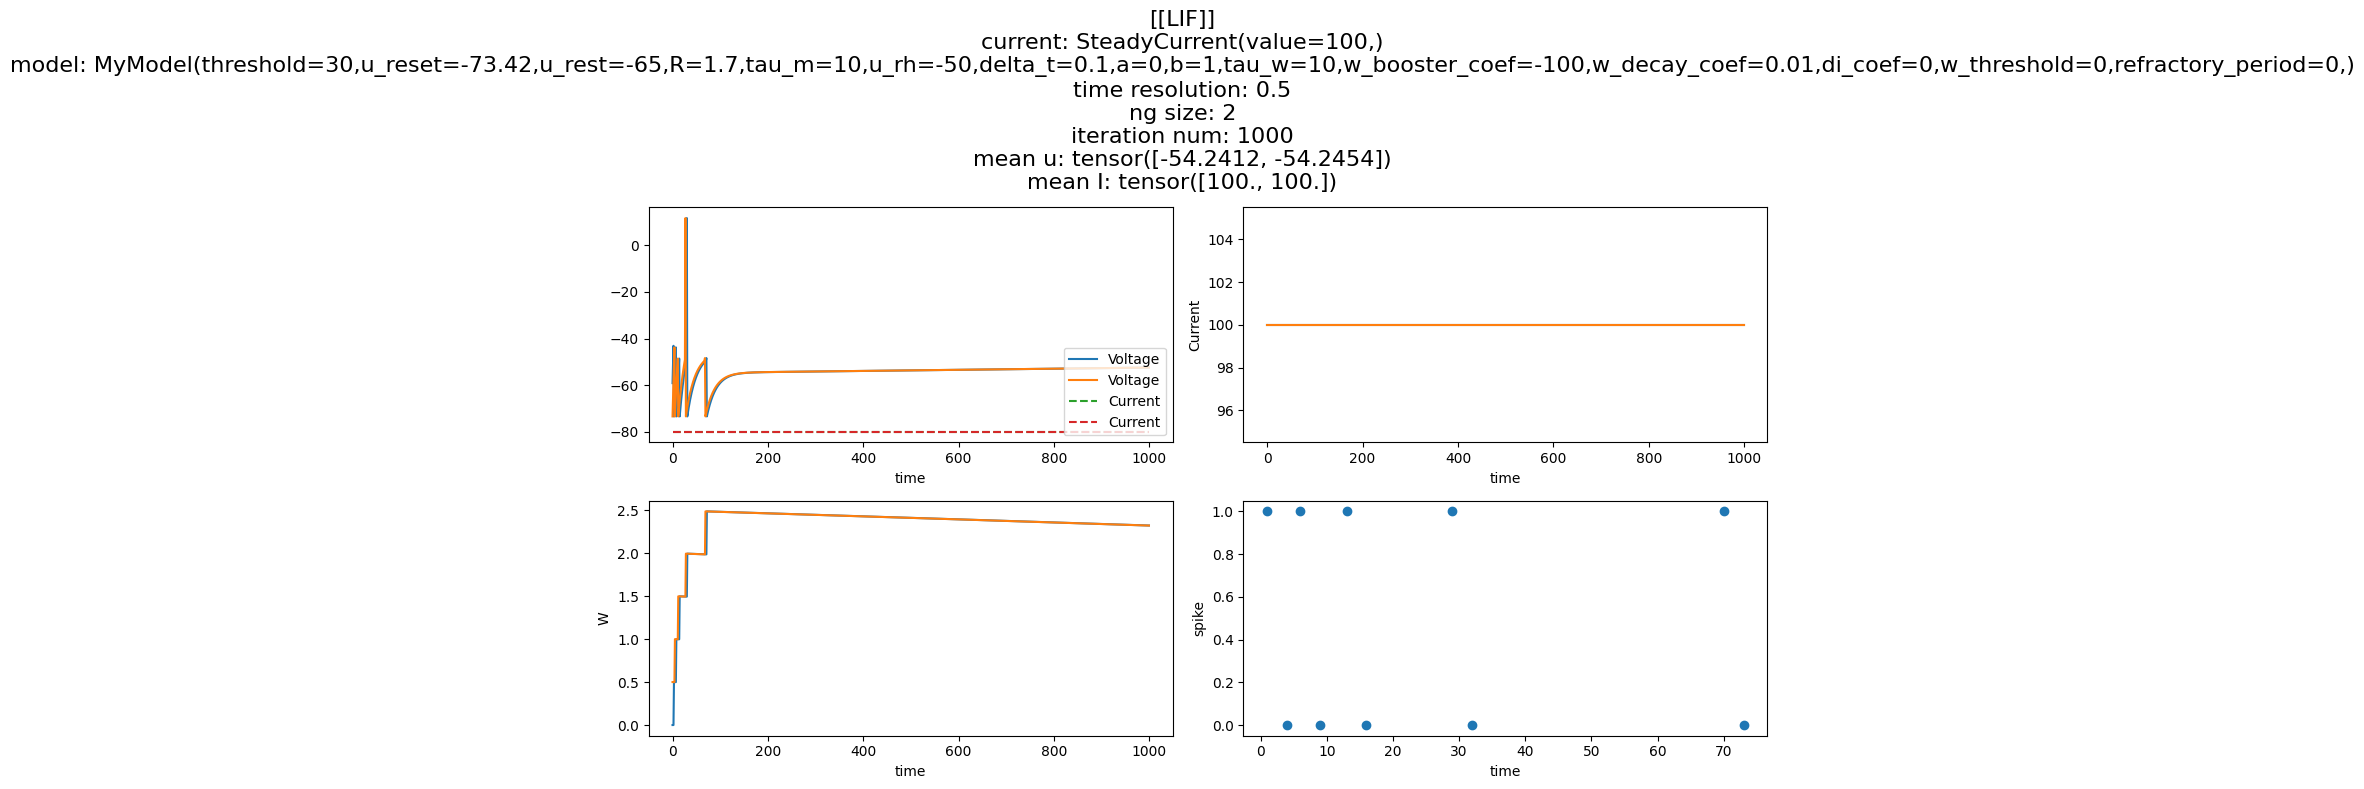

Network['Network_1', 'Network'](Neurons: tensor(2)|1 groups, Synapses: tensor(0.)|0 groups){1:TimeResolution(dt=0.5,)}
NeuronGroup['NeuronGroup_1', 'NeuronGroup', 'ng'](2){2:SteadyCurrent(value=100,)3:dI()4:MyModel(threshold=30,u_reset=-73.42,u_rest=-65,R=1.7,tau_m=10,u_rh=-50,delta_t=0.1,a=0,b=1,tau_w=10,w_booster_coef=-100,w_decay_coef=0.01,di_coef=0,w_threshold=0,refractory_period=0,)9:Recorder(variables=['u', 'I', 'w'],gap_width=0,max_length=None,auto_annotate=True,tag=ng1_rec, ng1_recorder,)10:EventRecorder(variables=None,gap_width=0,max_length=None,auto_annotate=True,tag=ng1_evrec,arg_0=spike,)}

In [6]:
simulate(model=MyAELIF(w_decay_coef=0.01, di_coef=0, b=1, tau_w=10, w_booster_coef=-100, w_threshold=0), current=cnt.SteadyCurrent(value=100),iteration=1000)

#### A - 1  AELIF - Noised

### -

## -

## StepFunctionCurrent

### A - 2 - AELIF

#### A - 2 - AELIF

#### -

#### A - 2 - AELIF - Noised

#### -

### -

## -

## SinCurrent

### A - 3 - AELIF

#### A - 3 - AELIF

change tau_w

#### -

#### A - 3 - AELIF - Noised

#### -

### -

## -

# -

# قسمت ب)

## B - 1 - AELIF 

## - 

# -

# ---

---

---

---

# AELIF